In [235]:
import pandas as pd
import nltk
import numpy 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [236]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\KAUSHAL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [237]:
df = pd.read_csv('spam.csv',encoding = "latin-1")

In [238]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [239]:
df.shape

(5572, 5)

In [240]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [241]:
df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)

In [242]:
df.rename({'v1':'target','v2':'sms'},axis=1,inplace=True)

In [243]:
df['target'].replace({'ham':0,'spam':1},inplace=True)

In [244]:
df.isna().sum()

target    0
sms       0
dtype: int64

In [245]:
df.isna().sum()

target    0
sms       0
dtype: int64

In [246]:
df.head()

,target,sms
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [247]:
df.isna().sum()

target    0
sms       0
dtype: int64

In [248]:
df.duplicated().sum()

403

In [249]:
df = df.drop_duplicates(keep='first')

In [250]:
df.duplicated().sum()

0

<AxesSubplot: xlabel='target', ylabel='count'>

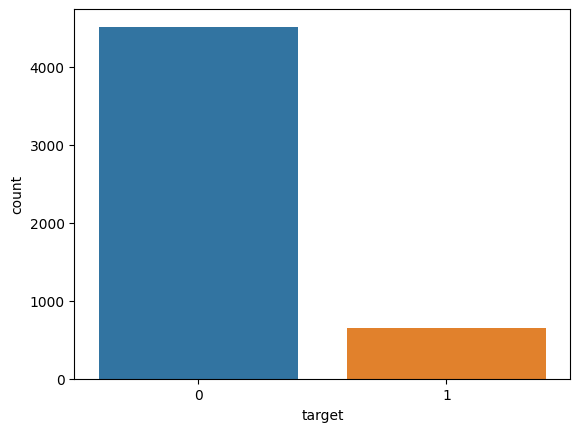

In [251]:
sns.countplot(x=df['target'])

In [252]:
df['nchar'] = df['sms'].apply(len)

In [253]:
token = df['sms'].apply(lambda x : x.split())

In [254]:
df['nwords'] = token.apply(len)

In [255]:
df['nsent'] = df['sms'].apply(lambda x : len(nltk.sent_tokenize(x)))

In [256]:
df.head()

,target,sms,nchar,nwords,nsent
0,0,"Go until jurong point, crazy.. Available only ...",111,20,2
1,0,Ok lar... Joking wif u oni...,29,6,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28,2
3,0,U dun say so early hor... U c already then say...,49,11,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,13,1


In [257]:
df[df['target']==1][['nchar','nwords','nsent']].describe()

,nchar,nwords,nsent
count,653.000000,653.000000,653.000000
mean,137.891271,23.681470,2.970904
std,30.137753,5.967672,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,22.000000,2.000000
50%,149.000000,25.000000,3.000000
75%,157.000000,28.000000,4.000000
max,224.000000,35.000000,9.000000


In [258]:
df[df['target']==0][['nchar','nwords','nsent']].describe()

,nchar,nwords,nsent
count,4516.000000,4516.000000,4516.000000
mean,70.459256,14.134632,1.820195
std,56.358207,11.116240,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,7.000000,1.000000
50%,52.000000,11.000000,1.000000
75%,90.000000,18.000000,2.000000
max,910.000000,171.000000,38.000000


<AxesSubplot: xlabel='nchar', ylabel='Count'>

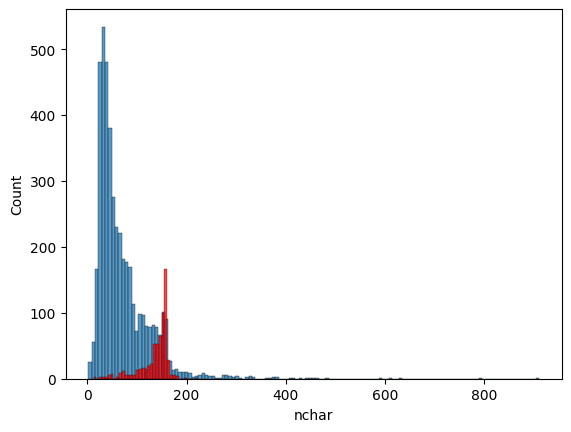

In [259]:
sns.histplot(df[df['target']==0]['nchar'])
sns.histplot(df[df['target']==1]['nchar'],color='red')

In [260]:
df

,target,sms,nchar,nwords,nsent
0,0,"Go until jurong point, crazy.. Available only ...",111,20,2
1,0,Ok lar... Joking wif u oni...,29,6,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28,2
3,0,U dun say so early hor... U c already then say...,49,11,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,13,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,30,4
5568,0,Will Ì_ b going to esplanade fr home?,37,8,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,10,2
5570,0,The guy did some bitching but I acted like i'd...,125,26,1


In [261]:
nltk.download('stopwords')
import string
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\KAUSHAL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [262]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [263]:
df['transformed_text'] = df['sms'].apply(transform_text)

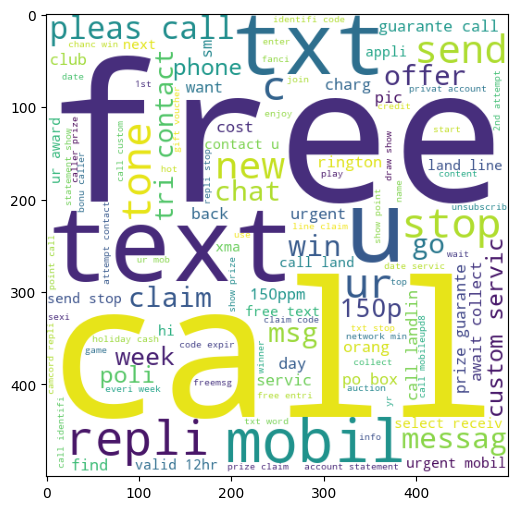

In [264]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

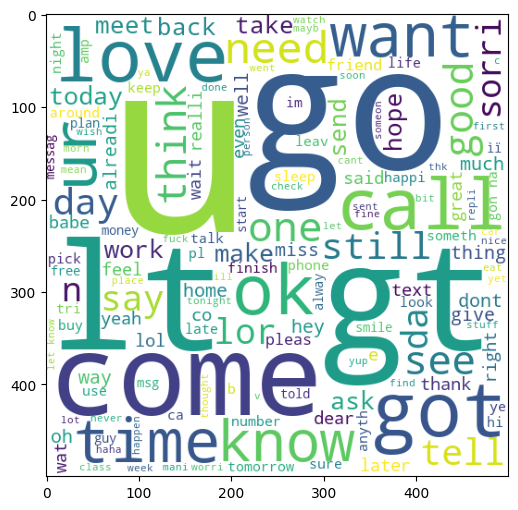

In [265]:
spam_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [266]:
from sklearn.feature_extraction.text import CountVectorizer
bow_vec = CountVectorizer(max_df=.8,min_df=2,max_features=3000)
bow = bow_vec.fit_transform(df['transformed_text'])

In [267]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(bow,df['target'],random_state=0,test_size=.02)

In [268]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [269]:
model = MultinomialNB()

In [270]:
model.fit(X_train,y_train)

MultinomialNB()

In [271]:
preds = model.predict(X_test)

In [272]:
print(accuracy_score(y_test,preds))
print(confusion_matrix(y_test,preds))
print(precision_score(y_test,preds))

0.9903846153846154
[[87  0]
 [ 1 16]]
1.0


In [274]:
import pickle
pickle.dump(model,open('model.pkl','wb'))
pickle.dump(bow_vec,open('vectorizer.pkl','wb'))